In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
plt.style.use("ggplot")

# Part A

### Exercise 1

In [1]:
try:
  data = pd.read_csv("diabetes_sympthoms.csv")
  print("Loaded")
except:
  print("Error")

Error


In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesLevel,Outcome,AgeCategory
0,6,148,72,35,0,33.6,0.627,1,Adult
1,1,85,66,29,0,26.6,0.351,0,Young
2,8,183,64,0,0,23.3,0.672,1,Adult
3,1,89,66,23,94,28.1,0.167,0,Young
4,0,137,40,35,168,43.1,2.288,1,Adult
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,Mature
764,2,122,70,27,0,36.8,0.340,0,Young
765,5,121,72,23,112,26.2,0.245,0,Young
766,1,126,60,0,0,30.1,0.349,1,Adult


### Exercise 2

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesLevel,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


לאחר שימוש בפקודת דסקרייב, ניתן להסיק מהנתונים כמה עובדות על הנבדקים על פי קריטריונים קבועים. לדוגמה עבור עמודת גלוקוז יש 768 שורות הממוצע הוא 120.894531 סטיית התקן 31.972618	המספר המינימלי 0.000000	המספר של ה25% הוא 99.000000	המספר החציוני הוא 117.00000 המספר ה 75% הוא 140.250000 והמקסימלי 17.000000

### Exercise 3

In [5]:
data["gender"] = data["Pregnancies"].apply(lambda x: "male" if x==0 else "female")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesLevel,Outcome,AgeCategory,gender
0,6,148,72,35,0,33.6,0.627,1,Adult,female
1,1,85,66,29,0,26.6,0.351,0,Young,female
2,8,183,64,0,0,23.3,0.672,1,Adult,female
3,1,89,66,23,94,28.1,0.167,0,Young,female
4,0,137,40,35,168,43.1,2.288,1,Adult,male
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,Mature,female
764,2,122,70,27,0,36.8,0.340,0,Young,female
765,5,121,72,23,112,26.2,0.245,0,Young,female
766,1,126,60,0,0,30.1,0.349,1,Adult,female


In [6]:
data.groupby("gender")["BloodPressure"].max().values[1]

110

### Exercise 4

In [7]:
data.groupby("gender")["SkinThickness"].mean().tail(1)

gender
male    22.27027
Name: SkinThickness, dtype: float64

### Exercise 5

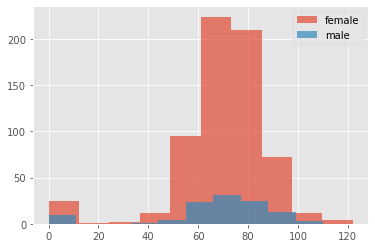

In [8]:
data.groupby("gender")["BloodPressure"].hist(legend=True, alpha=0.7)
plt.show()

ההתפלגות לחץ דם של גברים ונשים היא די דומה רק שיש הרבה יותר נשים מגברים בדטה

### Exercise 6

In [9]:
data.groupby("AgeCategory")["Glucose"].mean().index[1]

'Mature'

### Exercise 7

In [10]:
data["Insulin"][data["Pregnancies"]>8].mean()

58.174418604651166

### Exercise 8

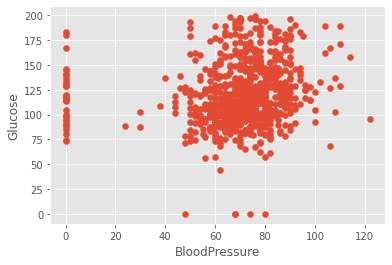

In [11]:
plt.scatter(x=data["BloodPressure"], y=data["Glucose"])
plt.xlabel("BloodPressure")
plt.ylabel("Glucose")
plt.show()

# Part B

### Exercise 1

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DiabetesLevel  768 non-null    float64
 7   Outcome        768 non-null    int64  
 8   AgeCategory    768 non-null    object 
 9   gender         768 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 60.1+ KB


### Exercise 2

In [13]:
new_data = data[["Pregnancies","Glucose","BloodPressure",
                 "SkinThickness","Insulin","BMI","DiabetesLevel","Outcome","AgeCategory"]]

In [14]:
dummy_data = pd.get_dummies(new_data)
dummy_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesLevel,Outcome,AgeCategory_Adult,AgeCategory_Mature,AgeCategory_Young
0,6,148,72,35,0,33.6,0.627,1,1,0,0
1,1,85,66,29,0,26.6,0.351,0,0,0,1
2,8,183,64,0,0,23.3,0.672,1,1,0,0
3,1,89,66,23,94,28.1,0.167,0,0,0,1
4,0,137,40,35,168,43.1,2.288,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,0,1,0
764,2,122,70,27,0,36.8,0.340,0,0,0,1
765,5,121,72,23,112,26.2,0.245,0,0,0,1
766,1,126,60,0,0,30.1,0.349,1,1,0,0


### Exercise 3

In [15]:
normalizer = MinMaxScaler()
normalized_data = pd.DataFrame(normalizer.fit_transform(dummy_data),
                              columns=dummy_data.columns)

In [16]:
normalized_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesLevel,Outcome,AgeCategory_Adult,AgeCategory_Mature,AgeCategory_Young
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,1.0,1.0,0.0,0.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.0,0.0,0.0,1.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,1.0,1.0,0.0,0.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.0,0.0,0.0,1.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.0,0.0,1.0,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.0,0.0,0.0,1.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.0,0.0,0.0,1.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,1.0,1.0,0.0,0.0


### Exercise 4

In [17]:
normalized_sse = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_data)
    normalized_sse.append(kmeans.inertia_)

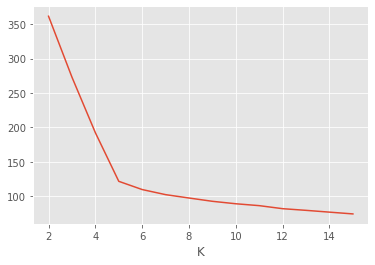

In [18]:
normalized_result = pd.DataFrame({
    "K": range(2,16),
    "SSE": normalized_sse
})
normalized_result.set_index("K", inplace=True)
normalized_result["SSE"].plot()
plt.show()

In [19]:
dummy_sse = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dummy_data)
    dummy_sse.append(kmeans.inertia_)

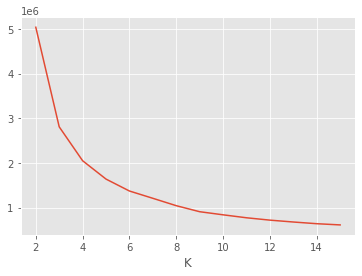

In [20]:
dummy_result = pd.DataFrame({
    "K": range(2,16),
    "SSE": dummy_sse
})
dummy_result.set_index("K", inplace=True)
dummy_result["SSE"].plot()
plt.show()

### Exercise 5

In [21]:
normalized_kmeans = KMeans(n_clusters=5)
normalized_kmeans.fit(normalized_data)

KMeans(n_clusters=5)

In [22]:
normalized_kmeans.labels_

array([0, 1, 0, 1, 0, 1, 4, 1, 0, 0, 1, 0, 3, 3, 0, 0, 4, 4, 2, 0, 1, 2,
       0, 4, 0, 0, 0, 1, 3, 2, 3, 4, 1, 1, 2, 2, 2, 0, 4, 3, 1, 2, 2, 0,
       2, 4, 1, 1, 4, 1, 1, 1, 1, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2,
       0, 2, 1, 1, 4, 1, 0, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 3, 1, 2, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 2, 1, 4,
       4, 0, 1, 1, 0, 3, 0, 1, 1, 1, 4, 1, 1, 3, 4, 4, 1, 1, 0, 3, 0, 0,
       4, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 3, 1, 1, 2, 0, 1,
       0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 4, 1, 1, 2, 0,
       2, 4, 2, 0, 2, 1, 1, 1, 2, 0, 3, 0, 4, 4, 1, 2, 0, 0, 2, 4, 1, 4,
       4, 4, 1, 1, 2, 1, 2, 1, 3, 0, 1, 0, 1, 1, 3, 4, 0, 0, 4, 2, 0, 0,
       4, 3, 2, 3, 1, 1, 1, 4, 1, 1, 4, 0, 1, 1, 1, 4, 0, 4, 0, 1, 1, 1,
       4, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 4, 1, 1, 1, 0, 2, 4, 1, 3,
       0, 2, 4, 1, 1, 4, 0, 1, 2, 1, 2, 1, 4, 1, 3, 1, 4, 2, 2, 0, 0, 2,
       2, 4, 1, 2, 1, 4, 4, 4, 3, 1, 4, 1, 0, 3, 4,

In [23]:
metrics.silhouette_score(normalized_data, normalized_kmeans.labels_)

0.5669525736269593

In [24]:
dummy_kmeans = KMeans(n_clusters=4)
dummy_kmeans.fit(dummy_data)

KMeans(n_clusters=4)

In [25]:
dummy_kmeans.labels_

array([1, 1, 1, 3, 0, 1, 3, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 3, 3, 0, 1,
       1, 1, 3, 3, 1, 3, 3, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 0, 3, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3,
       3, 1, 1, 0, 1, 1, 3, 0, 1, 3, 3, 0, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       3, 2, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 0, 1,
       0, 1, 1, 3, 1, 3, 1, 0, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 0, 1, 3, 2,
       1, 1, 3, 3, 1, 3, 1, 3, 0, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 1, 0, 1, 1,
       3, 0, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 1, 3, 0, 0, 3, 3, 1, 1,
       2, 1, 1, 0, 3, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3,
       1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 2, 3, 3, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 0, 1, 3, 3, 1, 1, 3,
       2, 0, 1, 3, 1, 3, 0, 0, 1, 3, 0, 0, 0, 1, 1,

In [26]:
metrics.silhouette_score(dummy_data, dummy_kmeans.labels_)

0.4424586538306248

### Exercise 6

In [27]:
normalized_data["cluster"] = normalized_kmeans.labels_

In [28]:
normalized_data.groupby("cluster").describe()

Pregnancies                                                         \
              count      mean       std  min       25%       50%       75%   
cluster                                                                      
0             148.0  0.383943  0.217672  0.0  0.235294  0.411765  0.529412   
1             338.0  0.118343  0.104027  0.0  0.058824  0.117647  0.176471   
2             129.0  0.351573  0.193211  0.0  0.235294  0.352941  0.470588   
3              50.0  0.336471  0.198163  0.0  0.235294  0.323529  0.470588   
4             103.0  0.142776  0.134744  0.0  0.000000  0.117647  0.235294   

                  Glucose            ... AgeCategory_Mature       \
              max   count      mean  ...                75%  max   
cluster                              ...                           
0        1.000000   148.0  0.705555  ...                0.0  0.0   
1        0.588235   338.0  0.538536  ...                0.0  0.0   
2        0.764706   129.0  0.566203  ...                0.0  0.0   
3        0.764706    50.0  0.690854  ...                1.0  1.0   
4        0.588235   103.0  0.704249  ...                0.0  0.0   

        AgeCategory_Young                                     
                    count mean  std  min  25%  50%  75%  max  
cluster                                                       
0                   148.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1                   338.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2                   129.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3                    50.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4                   103.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 88 columns]

# Part C

### Exercise 1

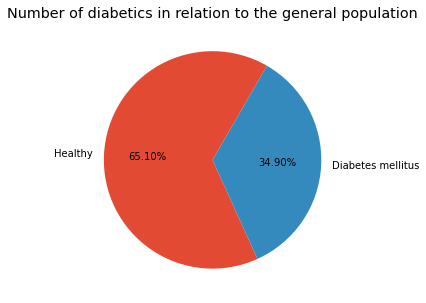

In [29]:
values = dummy_data["Outcome"].value_counts().values
l = ("Healthy","Diabetes mellitus")
plt.figure(figsize=(5,5))
plt.pie(values,labels=l,autopct="%1.2f%%",startangle=60)
plt.title("Number of diabetics in relation to the general population")
plt.show()

### Exercise 2

In [30]:
def split_train_test(x,y,num):
    if num < 0 or num > 1 :
        return "Error"
    else:
        return train_test_split(x,y,test_size=num)

### Exercise 3

In [31]:
x = dummy_data.drop(columns=["Outcome"])
y = dummy_data["Outcome"]
x_train,x_test,y_train,y_test = split_train_test( x , y , 0.25)

### Exercise 4

In [32]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

### Exercise 5

In [33]:
metrics.confusion_matrix(y_test,y_pred)

array([[101,  19],
       [ 27,  45]], dtype=int64)

In [34]:
metrics.accuracy_score(y_test,y_pred)

0.7604166666666666

ממטריצת הבלבול ניתן ללמוד שבצידה השמאלי העליון רואים את הכמות שנובאה כאנשים בריאים, ומצידה הימני העליון את סך כמות הטעויות כלומר הכמות שנובאה לא נכון
מצד ימין למטה רואים את כמות האנשים שנובא שחולי סכרת, ובצד שמאל למטה את כמות הטעויות כלומר הכמות שנובאה לא נכון
ובסופו של דבר מדד האקיורסי מראה את רמת הדיוק של האלגוריתם

### Exercise 6

In [35]:
Rf = RandomForestClassifier(n_estimators = 50)
Rf.fit(x_train,y_train)
Rf_pred = Rf.predict(x_test)

### Exercise 7

In [36]:
metrics.confusion_matrix(y_test,Rf_pred)

array([[104,  16],
       [ 32,  40]], dtype=int64)

In [37]:
metrics.accuracy_score(y_test,Rf_pred)

0.75

מה שהוסבר בסעיף 5 זהה גם לכאן, רק שבשימוש ברנדום פורסט הרמת דיוק עולה ביחס לדסיז'ן טרי בגלל שברנדום פורסט הרוב קובע ומספר עצי ההחלטה גבוה משמעותית  

### Exercise 8

In [44]:
data_test={'columns' : x_train.columns , 'percentage' : tree.feature_importances_ *100}
df = pd.DataFrame(data_test)
df

,columns,percentage
0,Pregnancies,8.573771
1,Glucose,32.307214
2,BloodPressure,8.506102
3,SkinThickness,4.365538
4,Insulin,6.687064
5,BMI,19.819743
6,DiabetesLevel,12.322989
7,AgeCategory_Adult,1.280917
8,AgeCategory_Mature,0.386681
9,AgeCategory_Young,5.749982


In [45]:
df.sort_values("percentage").tail(1)

,columns,percentage
1,Glucose,32.307214


In [46]:
df.sort_values("percentage").head(1)

,columns,percentage
8,AgeCategory_Mature,0.386681
